In [97]:
# Checking the calibration data at a further distance
# dist = 12cm vs previous 3.4 cm

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import spinmob as s

In [131]:
'''
giving a fitter, returns an array of the fitted lorentzian1 parameters and errors in 2D array
arg: my_fitter = fit, x = integer value offset

'''
def getFits_lor(my_fitter, x):
    
    di = my_fitter.get_fit_results()
    results = [di[key] for key in di.keys()]
    
    E0 = [results[0+6*x], results[1+6*x]]
    gamma = [results[2+3*x], results[3+6*x]]
    A = [results[4+3*x], results[+6*x]]
    B = [results[6+3*x], results[7+6*x]]
    
    return [E0, gamma, A, B]

"""
Takes array of channels, and m, b of linear function
Returns array of velocities [mmsec]
"""
def chan_to_velo(channels, m, b):
    v = [m[0]*c + b[0] for c in channels]
#     vE = 
    
    return v

"""
"""
def average(a, b, offset):
    
    center = (a[0] - b[0]) / 2.0 + offset[0]
    err = np.sqrt((np.sqrt((a[1])**2 + (b[1])**2)*0.5)**2+(offset[1])**2)
    
    return [center, err]
    

#one lorentzians with offset
def lorentzian(E, E0, gamma, A, b):
    denom = (E-E0)**2 + (gamma/2)**2
    return A*gamma**2/denom + b

#2 lorentzians added together with one offset
def lorentzian2(E, E0, gamma, A, E0_2, gamma_2, A_2, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + b

#6 lorentzians added together with one offset
def lorentzian6(E, E0, gamma, A, E0_2, gamma_2, A_2, E0_3, gamma_3, A_3, E0_4, gamma_4, A_4, E0_5, gamma_5, A_5, E0_6, gamma_6, A_6, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2
    denom_3 = (E-E0_3)**2 + (gamma_3/2)**2
    denom_4 = (E-E0_4)**2 + (gamma_4/2)**2
    denom_5 = (E-E0_5)**2 + (gamma_5/2)**2
    denom_6 = (E-E0_6)**2 + (gamma_6/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + A_3*gamma_3**2/denom_3 + A_4*gamma_4**2/denom_4 + A_5*gamma_5**2/denom_5 + A_6*gamma_6**2/denom_6 + b

#2 lorentzians added together with one offset
def lorentzian2Const(E, center, dist, gamma, A, gamma_2, b):
#     center, dist
#     E0 = center - dist
#     E0_2 = center + dist
    denom = (E- (center - dist) )**2 + (gamma/2)**2
    denom_2 = (E- (center + dist) )**2 + (gamma_2/2)**2

    return A*gamma**2/denom + A*gamma_2**2/denom_2 + b


def lorentzian6const(E, center, dist, gamma, A, center_2, dist_2, gamma_2, A_2, center_3, dist_3, gamma_3, A_3, b):

    denom = (E-(center - dist))**2 + (gamma/2)**2
    denom_2 = (E-(center_2 - dist_2))**2 + (gamma_2/2)**2
    denom_3 = (E-(center_3 - dist_3))**2 + (gamma_3/2)**2
    denom_4 = (E-(center_3 + dist_3))**2 + (gamma_3/2)**2
    denom_5 = (E-(center_2 + dist_2))**2 + (gamma_2/2)**2
    denom_6 = (E-(center + dist))**2 + (gamma/2)**2
    
    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + A_3*gamma_3**2/denom_3 + A_3*gamma_3**2/denom_4 + A_2*gamma_2**2/denom_5 + A*gamma**2/denom_6 + b


    
    

# Fitting unfolded calibration data 
REALLY big chi squared wtf

In [132]:
#for velocity matching later
#literature values (from 1-6), (mm/sec)
#Cite as: Journal of Applied Physics 42, 4339 (1971); https://doi.org/10.1063/1.1659777
litValCal = [-5.4823, -3.2473, -1.0132, 0.6624, 2.8967, 5.1338]
litValCalE = [0.0008, 0.0008, 0.0010, 0.0007, 0.0007, 0.0010]

### Fitting unfolded calibration data 

In [133]:
data = np.loadtxt(".//data//ironfoil_longerdistance_Jan20_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])


dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]
dataR = [data[0][256:512], data[1][256:512], ydataerr[256:512]]

# print(len(dataR[0]), len(dataL[0]))
# data[0][511]

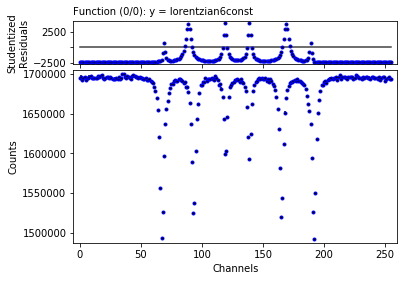

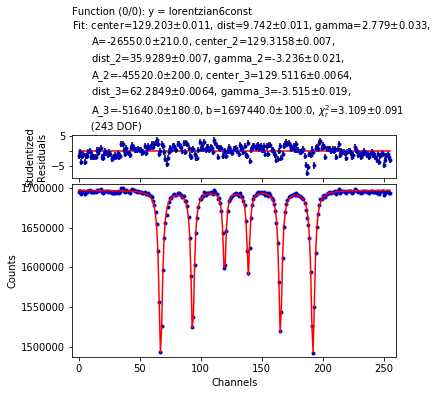


# FIT RESULTS (reduced chi squared = [3.1091300835101867])
center     = 129.203
dist       = 9.74185
gamma      = 2.77872
A          = -26548.9
center_2   = 129.316
dist_2     = 35.9289
gamma_2    = -3.23592
A_2        = -45518.5
center_3   = 129.512
dist_3     = 62.2849
gamma_3    = -3.51461
A_3        = -51644.2
b          = 1.69744E+06



In [134]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")

# (E, center, dist, gamma, A, center_2, dist_2, gamma_2, A_2, center_3, dist_3, gamma_3, A_3, gamma_4, gamma_5, gamma_6, b)
guess = 'center=129, dist=10, gamma=3, A=-2e6, center_2=129, dist_2=40, gamma_2=5, A_2=-2e6, center_3=129, dist_3 = 60, gamma_3=2, A_3=-1e6, b=4.8e6'

my_fitter.set_functions(f=lorentzian6const, p=guess)

my_fitter.set_data(xdata=dataL[0], ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
my_fitter.print_fit_parameters()

# resultsRS = getFits_lor(my_fitter, 5)

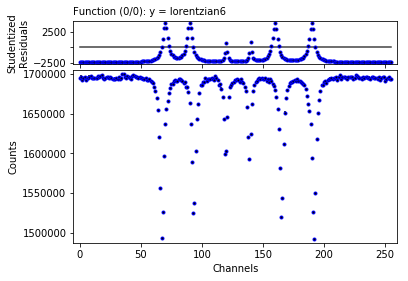

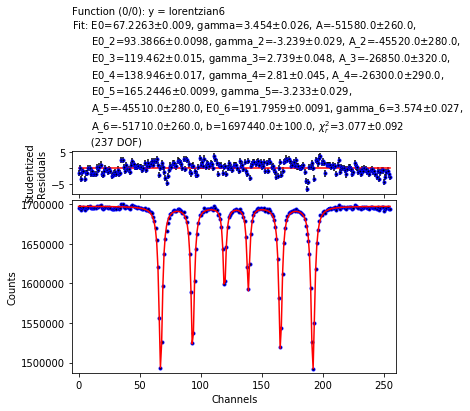

In [102]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")

guess = 'E0=70,gamma=5,A=-2e6, E0_2=90, gamma_2=5, A_2=-2e6, E0_3=120, gamma_3=2, A_3=-1e6, E0_4=140, gamma_4=2, A_4=-1e6, E0_5=160, gamma_5=5, A_5=-2e6, E0_6=190, gamma_6=5, A_6=-2e6, b=4.8e6'

my_fitter.set_functions(f=lorentzian6, p=guess)

my_fitter.set_data(xdata=dataL[0], ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# print(my_fitter.get_fit_results())

resultsLS = getFits_lor(my_fitter, 0)



In [103]:
#checking center of Cal data
cent = average(resultsRS[0], resultsLS[0], resultsLS[0])

print(cent)

[256.3232191873547, 0.011122057411679794]


# Trying to Match Peaks and velocities
Velocities are from Journal of Applied Physics 42, 4339 (1971); https://doi.org/10.1063/1.1659777  
Currently only using LS of data, we don't really know the right direction yet requires isomer shift).

In [104]:
#matching to lit. values
peaksL = [getFits_lor(my_fitter, 0)[0][0], getFits_lor(my_fitter, 1)[0][0], getFits_lor(my_fitter, 2)[0][0], getFits_lor(my_fitter, 3)[0][0], getFits_lor(my_fitter, 4)[0][0], getFits_lor(my_fitter, 5)[0][0] ]
peaksLEr = [getFits_lor(my_fitter, 0)[0][1], getFits_lor(my_fitter, 1)[0][1], getFits_lor(my_fitter, 2)[0][1], getFits_lor(my_fitter, 3)[0][1], getFits_lor(my_fitter, 4)[0][1], getFits_lor(my_fitter, 5)[0][1] ]

peaksRev = [getFits_lor(my_fitter, 0)[0][0], getFits_lor(my_fitter, 1)[0][0], getFits_lor(my_fitter, 2)[0][0], getFits_lor(my_fitter, 3)[0][0], getFits_lor(my_fitter, 4)[0][0], getFits_lor(my_fitter, 5)[0][0] ]
peaksRevEr = [getFits_lor(my_fitter, 0)[0][1], getFits_lor(my_fitter, 1)[0][1], getFits_lor(my_fitter, 2)[0][1], getFits_lor(my_fitter, 3)[0][1], getFits_lor(my_fitter, 4)[0][1], getFits_lor(my_fitter, 5)[0][1] ]

peaksRev.reverse() 
peaksRevEr.reverse() 

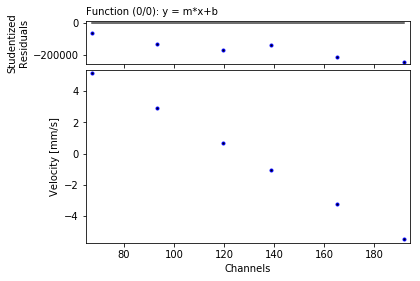

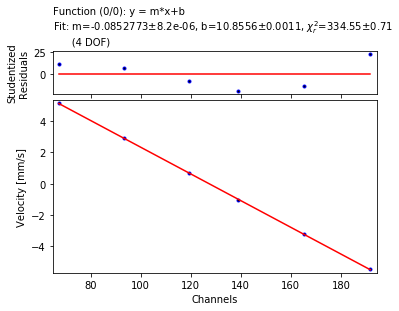


# FIT RESULTS (reduced chi squared = [334.55442959524436])
m          = -0.0852773
b          = 10.8556



In [105]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Velocity [mm/s]")
my_fitter.set_functions(f='m*x+b', p='m, b')
my_fitter.set_data(xdata=peaksRev, ydata=litValCal, eydata=litValCalE, exdata=peaksRevEr)
my_fitter.fit()
my_fitter.print_fit_parameters()

In [108]:
di = my_fitter.get_fit_results()
results = [di[key] for key in di.keys()]
m = [results[0], results[1]]
b = [results[2], results[3]]

# #looking at redifining the zero velocity using the center of the cal peaks
# ## CHECK if we should do this
new00 = average([peaksL[3],peaksLEr[3]],[peaksL[2],peaksLEr[2]],[peaksL[2],peaksLEr[2]])
new01 = average([peaksL[4],peaksLEr[4]],[peaksL[1],peaksLEr[1]],[peaksL[1],peaksLEr[1]])
new02 = average([peaksL[5],peaksLEr[5]],[peaksL[0],peaksLEr[0]],[peaksL[0],peaksLEr[0]])

# print(new00, new01, new02)

# #different between linear fit to zero and center of peaks
# print(new00, new01, new02)
center = average(average(new00, new01, new01), new02, new02)
# print(center)
c = np.rint(center)
#setting center as 0 velocity
# print(c)
getZero = chan_to_velo([c[0]], m, b)
b[0] = b[0]-getZero[0]
# print(chan_to_velo([c], m, b))

## Isomer shift
ferrous Ammonia Sulphate


In [127]:
#testing with stainlessSteel data which only has one peak
data = np.loadtxt(".//data//ferrousAmmoniaSulphate_Jan17_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])

dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]

#folding the data
foldD = fold(data[1], ydataerr)
foldedData = [data[0][0:256], foldD[0], foldD[1]]

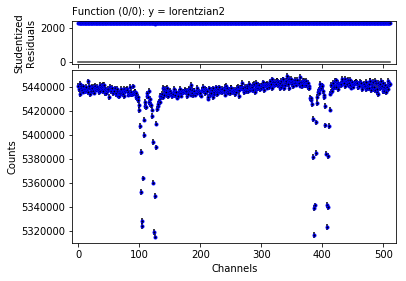

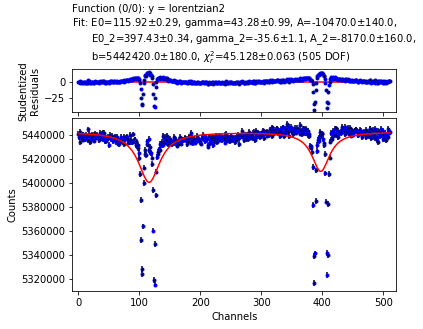


# FIT RESULTS (reduced chi squared = [45.12783379937257])
E0         = 115.924
gamma      = 43.2843
A          = -10471.1
E0_2       = 397.432
gamma_2    = -35.5566
A_2        = -8168.36
b          = 5.44242E+06



In [128]:
# lorentzian2 - for fitting 2
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")
# help(s.data.fitter)

my_fitter.set_functions(f=lorentzian2, p='E0=130,gamma=5,A=-2300,E0_2=382,gamma_2=5,A_2=-2300,b=58000')
my_fitter.set_data(xdata=data[0], ydata=data[1], eydata=ydataerr)
my_fitter.fit()
my_fitter.print_fit_parameters()


In [111]:
# # fitLS, fitRS - checking center of SS

# center = (fitRS[0][0] - fitLS[0][0]) / 2.0 + fitLS[0][0]
# print(center)
# 512/2

# output:

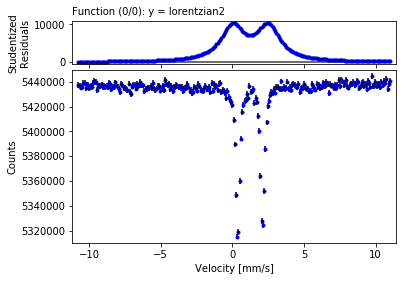

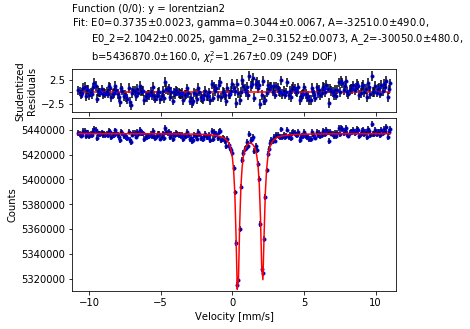

In [112]:
#unfolded fit - LHS of SSfoil
velocities = chan_to_velo(dataL[0], m, b)

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")
# help(s.data.fitter)

my_fitter.set_functions(f=lorentzian2, p='E0=0,gamma=2,A=-5.3e6, E0_2=2.5, gamma_2=2, A_2=-5.3e6, b=5.4e6')

my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# print(my_fitter.get_fit_results())

results = [getFits_lor(my_fitter, 0), getFits_lor(my_fitter, 1)]

In [113]:
#get center (is this the isomer shift?)
peak1 = results[0][0]
peak2 = results[1][0]

center = average(peak2, peak1, peak1)
print(center)

[1.2388429019550042, 0.0028392684911161077]
